Deternuba si el catastro es igual shp de avance de cosecha

In [144]:
import geopandas as gpd
import pandas as pd

In [109]:
path_shp_cat = r'D:/OneDrive - Ingenio Azucarero Guabira S.A/INFORMACION GENERAL/CATASTRO/catastro050823.shp'
path_shp_avan = r'D:/Ingenio Azucarero Guabira S.A/UTEA - SEMANAL - AVANCE COSECHA/2023/ANALISIS DE CAÑA EN CAMPO 2023/REPORTE_AVANCE_COSECHA/SHP/CosechaRv1.shx'

In [37]:
shp_cat = gpd.read_file(path_shp_cat)

<AxesSubplot:>

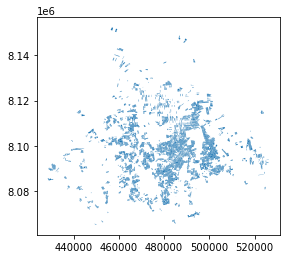

In [38]:
shp_cat.plot()

In [49]:
# filtra, solo lotes con caña
cat = shp_cat[shp_cat['cultivo']=='canha']
cat.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,variedad23,fsc23,textura,financia,soca,cultivo,zona,area,geometry
0,00005600000L1.3,560,LA TUJA IAG SA,15284,ROJAS CORDOVA ROGELIO FELIPE,L1.3,UCG_90-20,2018-05-30,None,None,FA,IAG,4,canha,79,0.77,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,00005600000L2.2,560,LA TUJA IAG SA,15284,ROJAS CORDOVA ROGELIO FELIPE,L2.2,CITTCA_85-22,2018-05-20,None,None,FY,IAG,4,canha,79,2.30,"POLYGON Z ((492267.796 8084944.479 0.000, 4923..."
3,00005600000L6.2,560,LA TUJA IAG SA,15284,ROJAS CORDOVA ROGELIO FELIPE,L6.2,UCG_90-20,2018-05-20,None,None,F,IAG,4,canha,79,6.51,"POLYGON Z ((492296.840 8084909.501 0.000, 4922..."


In [78]:
len(cat)

10365

In [110]:
cat['id'] = cat['unidad_01'].astype(str) + '|' + cat['unidad_03'].astype(str) + '|' + cat['unidad_05']
cat.head(3)

C:\Users\Bismar\.conda\envs\utea_reportes\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,variedad23,fsc23,textura,financia,soca,cultivo,zona,area,geometry
0,560|15284|L1.3,560,LA TUJA IAG SA,15284,ROJAS CORDOVA ROGELIO FELIPE,L1.3,UCG_90-20,2018-05-30,None,None,FA,IAG,4,canha,79,0.77,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,560|15284|L2.2,560,LA TUJA IAG SA,15284,ROJAS CORDOVA ROGELIO FELIPE,L2.2,CITTCA_85-22,2018-05-20,None,None,FY,IAG,4,canha,79,2.30,"POLYGON Z ((492267.796 8084944.479 0.000, 4923..."
3,560|15284|L6.2,560,LA TUJA IAG SA,15284,ROJAS CORDOVA ROGELIO FELIPE,L6.2,UCG_90-20,2018-05-20,None,None,F,IAG,4,canha,79,6.51,"POLYGON Z ((492296.840 8084909.501 0.000, 4922..."


In [132]:
shp_avan = gpd.read_file(path_shp_avan)

<AxesSubplot:>

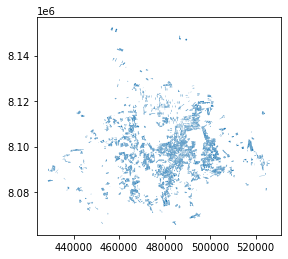

In [133]:
shp_avan.plot()

In [140]:
shp_avan['id'] = shp_avan['unidad_01'].astype(str) + "|" + shp_avan['unidad_03'].astype(str) + "|" + shp_avan['unidad_05']
shp_avan.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,soca,cultivo,zona,area,semana,fc,fsi,estado,fsico,geometry
0,560|15284|L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,2018-05-30,4,canha,79,0.77,0,None,0,sincosecha,0,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,560|15284|L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,2018-05-20,4,canha,79,2.30,0,None,0,sincosecha,0,"POLYGON Z ((492267.796 8084944.479 0.000, 4923..."
2,560|15284|L6.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L6.2,UCG_90-20,2018-05-20,4,canha,79,6.51,0,None,0,sincosecha,0,"POLYGON Z ((492296.840 8084909.501 0.000, 4922..."


In [148]:
pd.DataFrame(shp_avan.groupby('id')['area'].sum()).reset_index()

,id,area
0,1000|16213|L1.1,2.48
1,1000|16213|L1.3,0.84
2,1000|16213|L2.2,3.90
3,1000|16213|L3,4.27
4,1000|16213|L4,9.28
...,...,...
10267,9|18115|L1,1.68
10268,9|18115|L2,1.71
10269,9|18115|L3.1,1.64
10270,9|18115|L3.2,1.77
